In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


## Basic data study

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,Null
freq,3849,504,4537,4537,2376,233,423,550,5625,8347


In [3]:
for i in df.columns:
    print(f'The unique values in {i} are : {df[i].unique()}')
    print('*'*125)

The unique values in Airline are : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
*****************************************************************************************************************************
The unique values in Date_of_Journey are : ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
*************************************

### Airline
We can see that there are two different classes that belong to the same Airline. So, we can combine them into a single Airline
i.e., the columns Vistara and Vistara premium economy belong to the same Airline; the columns Jet Airways and Jet Airways business belong to the same Airline; the columns Multiple carriers and Multiple carriers premium economy belong to the same Airline

In [4]:
df['Airline'].replace(to_replace=['Vistara Premium economy','Jet Airways Business','Multiple carriers Premium economy'],value=['Vistara','Jet Airways','Multiple carriers'],inplace=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


In [5]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

### Date_of_Journey
In the Date of journey column, we do not know if they have entered the Date in the correct format..it can be dd/mm/yyyy or mm/dd/yyyy. So, we have to convert the values in the Date of journey column to a single format
i.e., we can use 'pd.DatetimeIndex' inorder to maintain a single format (dd/mm/yyyy), because in real-time, we do not what the format of the date is..so, we do this inorder to make everything into a single format

In [6]:
df['Date_of_Journey']=pd.DatetimeIndex(df['Date_of_Journey'])
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


### Destination
We can see that we have a value 'New Delhi' and another value 'Delhi'.. So, we can combine them both
i.e., We know that New Delhi belongs to Delhi only..so, there is no need to combine them

In [7]:
df['Destination'].replace(to_replace='New Delhi',value='Delhi',inplace=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


In [8]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

### Route
As of now, we don't consider the Route column because the values in the Route column are a little complicated for cleaning..So, we can drop it

In [9]:
df.drop('Route',axis=1,inplace=True)
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,2h 40m,non-stop,Null,12648


### Arrival_Time
The values in the Arrival_Time do not have a single format.. So, we must go through its values and see what the majority values look like, so that we can retain that format
i.e., we can remove the Date and Month also (if required)

In [10]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x : x[0:5])
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10,2h 50m,non-stop,Null,3897
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19h,2 stops,Null,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,2h 40m,non-stop,Null,12648


### Duration
Duration is nothing but the amount of time that we spend on air and layover
We have the values in hours and min format..so, we must make it into a single format (in hours preferably)

In [11]:
df['Duration']=df['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10,2.833333,non-stop,Null,3897
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7.416667,2 stops,Null,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19.000000,2 stops,Null,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5.416667,1 stop,Null,6218
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4.750000,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2.500000,non-stop,Null,4107
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2.583333,non-stop,Null,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3.000000,non-stop,Null,7229
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,2.666667,non-stop,Null,12648


### Total_Stops
We can see that we have one of the values as NaN in this column..so, we have to check for the no of NaNs before dropping it.
i.e., if we have one or two NaN values, then we can drop the row; if we have more than 50% of the rows with NaN values, then we can drop the column; if we have around 10% - 20% NaN values, then we have to fill the NaN values

In [12]:
df.dropna(inplace=True) # common for all the rows
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10,2.833333,non-stop,Null,3897
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7.416667,2 stops,Null,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19.000000,2 stops,Null,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5.416667,1 stop,Null,6218
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4.750000,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2.500000,non-stop,Null,4107
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2.583333,non-stop,Null,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3.000000,non-stop,Null,7229
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,2.666667,non-stop,Null,12648


In [13]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

### Additional_Info
We can see that we have two types of Null in this column - 'Null' and 'Null '.. we already saw that almost 80% of the column has the value as Null
Actually, we have to remove both the type of Null values, but since we have almost 80% of the values as Null, we can drop this entire column

In [14]:
df.drop('Additional_Info',axis=1,inplace=True)
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10,2.833333,non-stop,3897
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7.416667,2 stops,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19.000000,2 stops,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5.416667,1 stop,6218
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4.750000,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2.500000,non-stop,4107
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2.583333,non-stop,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3.000000,non-stop,7229
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,2.666667,non-stop,12648


## Modifications in the dataset

In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10,2.833333,non-stop,3897
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7.416667,2 stops,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19.000000,2 stops,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5.416667,1 stop,6218
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4.750000,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2.500000,non-stop,4107
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2.583333,non-stop,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3.000000,non-stop,7229
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,2.666667,non-stop,12648


### For EDA

#### Airline
The column Airline is a nominal category

#### Date_of_Journey
The date of journey column is in the format dd/mm/yyyy, so we can extract out the date, month and year separately
However, since the year is 2019 throughout this column, there is no use of it

In [16]:
df['DOJDate']=df['Date_of_Journey'].dt.day
df['DOJMonth']=df['Date_of_Journey'].dt.month
df['DOJMonth']=df['DOJMonth'].replace(to_replace=[1,2,3,4,5,6,7,8,9,10,11,12],
                                      value=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,DOJDate,DOJMonth
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10,2.833333,non-stop,3897,24,Mar
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7.416667,2 stops,7662,5,Jan
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19.000000,2 stops,13882,6,Sep
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5.416667,1 stop,6218,5,Dec
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4.750000,1 stop,13302,3,Jan
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2.500000,non-stop,4107,4,Sep
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2.583333,non-stop,4145,27,Apr
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3.000000,non-stop,7229,27,Apr
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,2.666667,non-stop,12648,3,Jan


#### Dep_Time
We can extract out the hours and mins separately in this column

In [17]:
df['DTHour']=pd.DatetimeIndex(df['Dep_Time']).hour
df['DTMin']=pd.DatetimeIndex(df['Dep_Time']).minute
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,DOJDate,DOJMonth,DTHour,DTMin
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10,2.833333,non-stop,3897,24,Mar,22,20
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7.416667,2 stops,7662,5,Jan,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19.000000,2 stops,13882,6,Sep,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5.416667,1 stop,6218,5,Dec,18,5
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4.750000,1 stop,13302,3,Jan,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2.500000,non-stop,4107,4,Sep,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2.583333,non-stop,4145,27,Apr,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3.000000,non-stop,7229,27,Apr,8,20
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,2.666667,non-stop,12648,3,Jan,11,30


#### Arrival_Time
We can extract out the hours and mins separately in this column

In [18]:
df['ATHour']=pd.DatetimeIndex(df['Arrival_Time']).hour
df['ATMin']=pd.DatetimeIndex(df['Arrival_Time']).minute
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,DOJDate,DOJMonth,DTHour,DTMin,ATHour,ATMin
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10,2.833333,non-stop,3897,24,Mar,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7.416667,2 stops,7662,5,Jan,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19.000000,2 stops,13882,6,Sep,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5.416667,1 stop,6218,5,Dec,18,5,23,30
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4.750000,1 stop,13302,3,Jan,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2.500000,non-stop,4107,4,Sep,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2.583333,non-stop,4145,27,Apr,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3.000000,non-stop,7229,27,Apr,8,20,11,20
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,2.666667,non-stop,12648,3,Jan,11,30,14,10


In [21]:
df.drop(columns=['Dep_Time','Arrival_Time'],axis=1,inplace=True)
df

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,DOJDate,DOJMonth,DTHour,DTMin,ATHour,ATMin
0,IndiGo,2019-03-24,Banglore,Delhi,2.833333,non-stop,3897,24,Mar,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,7.416667,2 stops,7662,5,Jan,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,19.000000,2 stops,13882,6,Sep,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,5.416667,1 stop,6218,5,Dec,18,5,23,30
4,IndiGo,2019-01-03,Banglore,Delhi,4.750000,1 stop,13302,3,Jan,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,2.500000,non-stop,4107,4,Sep,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,2.583333,non-stop,4145,27,Apr,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,3.000000,non-stop,7229,27,Apr,8,20,11,20
10681,Vistara,2019-01-03,Banglore,Delhi,2.666667,non-stop,12648,3,Jan,11,30,14,10


In [22]:
df=df[['Airline','Date_of_Journey','Source','Destination','Duration','Total_Stops','DOJDate','DOJMonth','DTHour','DTMin','ATHour','ATMin','Price']]
df

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,DOJDate,DOJMonth,DTHour,DTMin,ATHour,ATMin,Price
0,IndiGo,2019-03-24,Banglore,Delhi,2.833333,non-stop,24,Mar,22,20,1,10,3897
1,Air India,2019-01-05,Kolkata,Banglore,7.416667,2 stops,5,Jan,5,50,13,15,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,19.000000,2 stops,6,Sep,9,25,4,25,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,5.416667,1 stop,5,Dec,18,5,23,30,6218
4,IndiGo,2019-01-03,Banglore,Delhi,4.750000,1 stop,3,Jan,16,50,21,35,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,2.500000,non-stop,4,Sep,19,55,22,25,4107
10679,Air India,2019-04-27,Kolkata,Banglore,2.583333,non-stop,27,Apr,20,45,23,20,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,3.000000,non-stop,27,Apr,8,20,11,20,7229
10681,Vistara,2019-01-03,Banglore,Delhi,2.666667,non-stop,3,Jan,11,30,14,10,12648


### For modelling

In [23]:
df=pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


#### Airline, Source, Destination

In [24]:
df=pd.get_dummies(data=df,columns=['Airline','Source','Destination'],drop_first=True)
df

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,0,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,0,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9/04/2019,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,27/04/2019,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145,1,0,...,0,0,0,1,0,0,0,0,0,0
10680,27/04/2019,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,01/03/2019,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Date_of_Journey

In [25]:
df['Date_of_Journey']=pd.DatetimeIndex(df['Date_of_Journey'])
df['DOJDate']=df['Date_of_Journey'].dt.day
df['DOJMonth']=df['Date_of_Journey'].dt.month
df

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,DOJDate,DOJMonth
0,2019-03-24,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,0,0,...,0,0,0,0,0,0,0,1,24,3
1,2019-01-05,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,0,...,0,1,0,0,0,0,0,0,5,1
2,2019-09-06,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,0,0,...,1,0,0,1,0,0,0,0,6,9
3,2019-12-05,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,0,0,...,0,1,0,0,0,0,0,0,5,12
4,2019-01-03,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,0,0,...,0,0,0,0,0,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2019-09-04,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107,0,0,...,0,1,0,0,0,0,0,0,4,9
10679,2019-04-27,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145,1,0,...,0,1,0,0,0,0,0,0,27,4
10680,2019-04-27,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229,0,0,...,0,0,0,0,1,0,0,0,27,4
10681,2019-01-03,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648,0,0,...,0,0,0,0,0,0,0,1,3,1


#### Dep_Time

In [26]:
df['DTHour']=pd.DatetimeIndex(df['Dep_Time']).hour
df['DTMin']=pd.DatetimeIndex(df['Dep_Time']).minute
df

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,DOJDate,DOJMonth,DTHour,DTMin
0,2019-03-24,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,0,0,...,0,0,0,0,0,1,24,3,22,20
1,2019-01-05,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,0,...,0,0,0,0,0,0,5,1,5,50
2,2019-09-06,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,0,0,...,0,1,0,0,0,0,6,9,9,25
3,2019-12-05,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,0,0,...,0,0,0,0,0,0,5,12,18,5
4,2019-01-03,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,0,0,...,0,0,0,0,0,1,3,1,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2019-09-04,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107,0,0,...,0,0,0,0,0,0,4,9,19,55
10679,2019-04-27,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145,1,0,...,0,0,0,0,0,0,27,4,20,45
10680,2019-04-27,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229,0,0,...,0,0,1,0,0,0,27,4,8,20
10681,2019-01-03,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648,0,0,...,0,0,0,0,0,1,3,1,11,30


#### Arrival_Time

In [27]:
df['ATHour']=pd.DatetimeIndex(df['Arrival_Time']).hour
df['ATMin']=pd.DatetimeIndex(df['Arrival_Time']).minute
df

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,DOJDate,DOJMonth,DTHour,DTMin,ATHour,ATMin
0,2019-03-24,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,0,0,...,0,0,0,1,24,3,22,20,1,10
1,2019-01-05,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,0,...,0,0,0,0,5,1,5,50,13,15
2,2019-09-06,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,0,0,...,0,0,0,0,6,9,9,25,4,25
3,2019-12-05,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,0,0,...,0,0,0,0,5,12,18,5,23,30
4,2019-01-03,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,0,0,...,0,0,0,1,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2019-09-04,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107,0,0,...,0,0,0,0,4,9,19,55,22,25
10679,2019-04-27,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145,1,0,...,0,0,0,0,27,4,20,45,23,20
10680,2019-04-27,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229,0,0,...,1,0,0,0,27,4,8,20,11,20
10681,2019-01-03,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648,0,0,...,0,0,0,1,3,1,11,30,14,10


#### Duration

In [28]:
df['Duration']=df['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)
df

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,DOJDate,DOJMonth,DTHour,DTMin,ATHour,ATMin
0,2019-03-24,BLR → DEL,22:20,01:10 22 Mar,2.833333,non-stop,Null,3897,0,0,...,0,0,0,1,24,3,22,20,1,10
1,2019-01-05,CCU → IXR → BBI → BLR,05:50,13:15,7.416667,2 stops,Null,7662,1,0,...,0,0,0,0,5,1,5,50,13,15
2,2019-09-06,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,Null,13882,0,0,...,0,0,0,0,6,9,9,25,4,25
3,2019-12-05,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,Null,6218,0,0,...,0,0,0,0,5,12,18,5,23,30
4,2019-01-03,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,Null,13302,0,0,...,0,0,0,1,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2019-09-04,CCU → BLR,19:55,22:25,2.500000,non-stop,Null,4107,0,0,...,0,0,0,0,4,9,19,55,22,25
10679,2019-04-27,CCU → BLR,20:45,23:20,2.583333,non-stop,Null,4145,1,0,...,0,0,0,0,27,4,20,45,23,20
10680,2019-04-27,BLR → DEL,08:20,11:20,3.000000,non-stop,Null,7229,0,0,...,1,0,0,0,27,4,8,20,11,20
10681,2019-01-03,BLR → DEL,11:30,14:10,2.666667,non-stop,Null,12648,0,0,...,0,0,0,1,3,1,11,30,14,10


#### Total_Stops

In [29]:
df.dropna(inplace=True)
df['Total_Stops']=df['Total_Stops'].replace(to_replace=['non-stop','1 stop','2 stops','3 stops','4 stops'],value=[0,1,2,3,4])
df['Total_Stops']=df['Total_Stops'].astype(int)
df

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,DOJDate,DOJMonth,DTHour,DTMin,ATHour,ATMin
0,2019-03-24,BLR → DEL,22:20,01:10 22 Mar,2.833333,0,Null,3897,0,0,...,0,0,0,1,24,3,22,20,1,10
1,2019-01-05,CCU → IXR → BBI → BLR,05:50,13:15,7.416667,2,Null,7662,1,0,...,0,0,0,0,5,1,5,50,13,15
2,2019-09-06,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2,Null,13882,0,0,...,0,0,0,0,6,9,9,25,4,25
3,2019-12-05,CCU → NAG → BLR,18:05,23:30,5.416667,1,Null,6218,0,0,...,0,0,0,0,5,12,18,5,23,30
4,2019-01-03,BLR → NAG → DEL,16:50,21:35,4.750000,1,Null,13302,0,0,...,0,0,0,1,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2019-09-04,CCU → BLR,19:55,22:25,2.500000,0,Null,4107,0,0,...,0,0,0,0,4,9,19,55,22,25
10679,2019-04-27,CCU → BLR,20:45,23:20,2.583333,0,Null,4145,1,0,...,0,0,0,0,27,4,20,45,23,20
10680,2019-04-27,BLR → DEL,08:20,11:20,3.000000,0,Null,7229,0,0,...,1,0,0,0,27,4,8,20,11,20
10681,2019-01-03,BLR → DEL,11:30,14:10,2.666667,0,Null,12648,0,0,...,0,0,0,1,3,1,11,30,14,10


#### Additional_Info, Route

In [30]:
df.drop(columns=['Route','Additional_Info'],inplace=True)
df.drop_duplicates(inplace=True)
df

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,DOJDate,DOJMonth,DTHour,DTMin,ATHour,ATMin
0,2019-03-24,22:20,01:10 22 Mar,2.833333,0,3897,0,0,1,0,...,0,0,0,1,24,3,22,20,1,10
1,2019-01-05,05:50,13:15,7.416667,2,7662,1,0,0,0,...,0,0,0,0,5,1,5,50,13,15
2,2019-09-06,09:25,04:25 10 Jun,19.000000,2,13882,0,0,0,1,...,0,0,0,0,6,9,9,25,4,25
3,2019-12-05,18:05,23:30,5.416667,1,6218,0,0,1,0,...,0,0,0,0,5,12,18,5,23,30
4,2019-01-03,16:50,21:35,4.750000,1,13302,0,0,1,0,...,0,0,0,1,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2019-09-04,19:55,22:25,2.500000,0,4107,0,0,0,0,...,0,0,0,0,4,9,19,55,22,25
10679,2019-04-27,20:45,23:20,2.583333,0,4145,1,0,0,0,...,0,0,0,0,27,4,20,45,23,20
10680,2019-04-27,08:20,11:20,3.000000,0,7229,0,0,0,1,...,1,0,0,0,27,4,8,20,11,20
10681,2019-01-03,11:30,14:10,2.666667,0,12648,0,0,0,0,...,0,0,0,1,3,1,11,30,14,10


#### Dropping the original columns that were present before modification

In [31]:
df.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'])

,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,DOJDate,DOJMonth,DTHour,DTMin,ATHour,ATMin
0,2.833333,0,3897,0,0,1,0,0,0,0,...,0,0,0,1,24,3,22,20,1,10
1,7.416667,2,7662,1,0,0,0,0,0,0,...,0,0,0,0,5,1,5,50,13,15
2,19.000000,2,13882,0,0,0,1,0,0,0,...,0,0,0,0,6,9,9,25,4,25
3,5.416667,1,6218,0,0,1,0,0,0,0,...,0,0,0,0,5,12,18,5,23,30
4,4.750000,1,13302,0,0,1,0,0,0,0,...,0,0,0,1,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2.500000,0,4107,0,0,0,0,0,0,0,...,0,0,0,0,4,9,19,55,22,25
10679,2.583333,0,4145,1,0,0,0,0,0,0,...,0,0,0,0,27,4,20,45,23,20
10680,3.000000,0,7229,0,0,0,1,0,0,0,...,1,0,0,0,27,4,8,20,11,20
10681,2.666667,0,12648,0,0,0,0,0,0,0,...,0,0,0,1,3,1,11,30,14,10


#### Bringing the output variable 'Price' to the rightmost

In [32]:
cols=df.columns.tolist()
print(cols,'\n')

cols=cols[:5]+cols[6:]+cols[5:6]
print(cols)

df=df[cols]
df.drop(columns=['Date_of_Journey', 'Dep_Time', 'Arrival_Time'],axis=1,inplace=True)
df

['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'DOJDate', 'DOJMonth', 'DTHour', 'DTMin', 'ATHour', 'ATMin'] 

['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Sour

,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,DOJDate,DOJMonth,DTHour,DTMin,ATHour,ATMin,Price
0,2.833333,0,0,0,1,0,0,0,0,0,...,0,0,1,24,3,22,20,1,10,3897
1,7.416667,2,1,0,0,0,0,0,0,0,...,0,0,0,5,1,5,50,13,15,7662
2,19.000000,2,0,0,0,1,0,0,0,0,...,0,0,0,6,9,9,25,4,25,13882
3,5.416667,1,0,0,1,0,0,0,0,0,...,0,0,0,5,12,18,5,23,30,6218
4,4.750000,1,0,0,1,0,0,0,0,0,...,0,0,1,3,1,16,50,21,35,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2.500000,0,0,0,0,0,0,0,0,0,...,0,0,0,4,9,19,55,22,25,4107
10679,2.583333,0,1,0,0,0,0,0,0,0,...,0,0,0,27,4,20,45,23,20,4145
10680,3.000000,0,0,0,0,1,0,0,0,0,...,0,0,0,27,4,8,20,11,20,7229
10681,2.666667,0,0,0,0,0,0,0,0,0,...,0,0,1,3,1,11,30,14,10,12648


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

## Import libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Get the dataset

In [7]:
data=pd.read_excel('Data_Train.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


## Function for preprocessing (EDA and model)

In [9]:
def preprocess(df):
    # dropping the rows that have NaN values
    df.dropna(inplace=True)
    # dropping the duplicate values
    df.drop_duplicates(inplace=True)
    # replacing the names of the Airlines
    df['Airline'].replace(to_replace=['Vistara Premium economy','Jet Airways Business','Multiple carriers Premium economy'],
                          value=['Vistara','Jet Airways','Multiple carriers'],inplace=True)
    # converting the Date_of_Journey column to a proper date format
    df['Date_of_Journey']=pd.DatetimeIndex(df['Date_of_Journey'])
    # replacing the name of the Destination
    df['Destination'].replace(to_replace='New Delhi',value='Delhi',inplace=True)
    # converting the Arrival_Time into a single format (only to hours and mins)
    df['Arrival_Time']=df['Arrival_Time'].apply(lambda x : x[0:5])
    # converting the Duration (hours and mins) to hours only format
    df['Duration']=df['Duration'].astype(str)
    df['Duration']=df['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)
    df['Duration']=df['Duration'].round(2)
    # extracting out Day from Date_of_Journey
    df['DOJDate']=df['Date_of_Journey'].dt.day
    # extracting out Month from Date_of_Journey
    df['DOJMonth']=df['Date_of_Journey'].dt.month
    # extracting out hour from Dep_Time
    df['DTHour']=pd.DatetimeIndex(df['Dep_Time']).hour
    # extracting out minute from Dep_Time
    df['DTMin']=pd.DatetimeIndex(df['Dep_Time']).minute
    # extracting out hour from Arrival_Time
    df['ATHour']=pd.DatetimeIndex(df['Arrival_Time']).hour
    # extracting out minute from Arrival_Time
    df['ATMin']=pd.DatetimeIndex(df['Arrival_Time']).minute
    
    # creating a dataframe for EDA
    df_eda=df.copy()
    # replacing the months to its corresponding values
    df_eda['DOJMonth']=df_eda['DOJMonth'].replace(to_replace=[1,2,3,4,5,6,7,8,9,10,11,12],
                                      value=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    
    # creating a dataframe for model
    df_model=df.copy()
    # encoding done in Airline, Source and Destination columns because they are categorical (nominal)
    df_model=pd.get_dummies(data=df_model,columns=['Airline','Source','Destination'],drop_first=True)
    # replacing the total no of stops with its corresponding values
    df_model['Total_Stops']=df_model['Total_Stops'].replace(to_replace=['non-stop','1 stop','2 stops','3 stops',
                                                                        '4 stops'],value=[0,1,2,3,4])
    df_model['Total_Stops']=df_model['Total_Stops'].astype(int)
    
    # dropping the original columns that were present before modification/extraction
    df_eda.drop(columns=['Route','Additional_Info','Dep_Time','Arrival_Time','Date_of_Journey'],axis=1,inplace=True)
    df_model.drop(columns=['Route','Additional_Info','Dep_Time','Arrival_Time','Date_of_Journey'],axis=1,inplace=True)
    
    # bringing the output variable 'Price' to the rightmost in EDA dataframe
    col1=df_eda.columns.tolist()
    col1=col1[:5]+col1[6:]+col1[5:6]
    df_eda=df_eda[col1]
    
    # bringing the output variable 'Price' to the rightmost in model dataframe
    col2=df_model.columns.tolist()
    col2=col2[:2]+col2[3:]+col2[2:3]
    df_model=df_model[col2]
    
    # returning two separate dataframes - one for EDA and the other for modelling
    return df_eda, df_model

df_eda, df_model = preprocess(data)

In [4]:
df_eda

,Airline,Source,Destination,Duration,Total_Stops,DOJDate,DOJMonth,DTHour,DTMin,ATHour,ATMin,Price
0,IndiGo,Banglore,Delhi,2.83,non-stop,24,Mar,22,20,1,10,3897
1,Air India,Kolkata,Banglore,7.42,2 stops,5,Jan,5,50,13,15,7662
2,Jet Airways,Delhi,Cochin,19.00,2 stops,6,Sep,9,25,4,25,13882
3,IndiGo,Kolkata,Banglore,5.42,1 stop,5,Dec,18,5,23,30,6218
4,IndiGo,Banglore,Delhi,4.75,1 stop,3,Jan,16,50,21,35,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2.50,non-stop,4,Sep,19,55,22,25,4107
10679,Air India,Kolkata,Banglore,2.58,non-stop,27,Apr,20,45,23,20,4145
10680,Jet Airways,Banglore,Delhi,3.00,non-stop,27,Apr,8,20,11,20,7229
10681,Vistara,Banglore,Delhi,2.67,non-stop,3,Jan,11,30,14,10,12648


## EDA

### Univariate

#### Duration

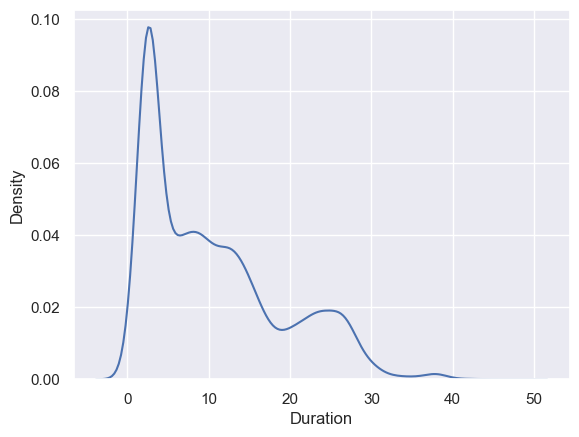

In [6]:
sns.kdeplot(data=df_eda,x='Duration')
plt.show()

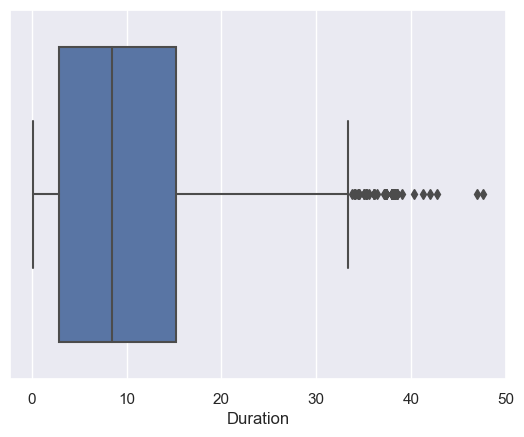

In [7]:
sns.boxplot(data=df_eda,x='Duration')
plt.show()

The duration of 3 to 17 hours is the most travelled by the people, because it takes almost one night and few hours to travel which is convenient <br>
The duration that are above 32 hours are outliers <br>
The plot is right-skewed

#### Price

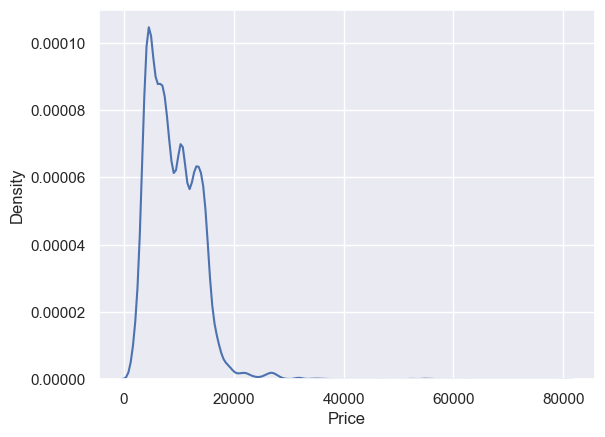

In [8]:
sns.kdeplot(data=df_eda,x='Price')
plt.show()

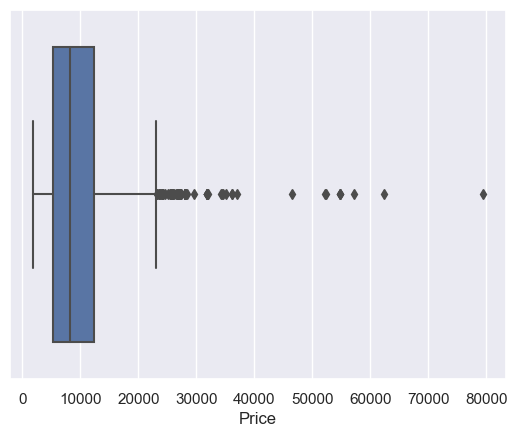

In [9]:
sns.boxplot(data=df_eda,x='Price')
plt.show()

The price range in which most of the people choose to travel are in the range of 5000 to 12000, because it is quite affordable <br>
The price that are above Rs.22000 are outliers <br>
The plot is right-skewed

#### Airline

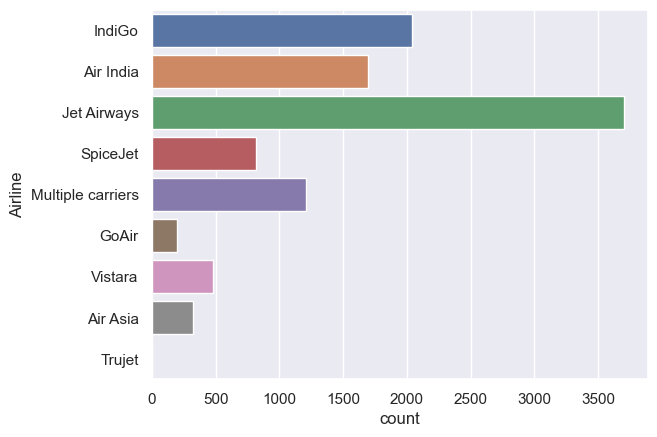

In [10]:
sns.countplot(data=df_eda,y='Airline')
plt.show()

The number of flights in Jet Airways is the highest because people may prefer Jet Airways due to its service (around 3800) <br>
The number of flights in Trujet is the lowest (1)

#### Source

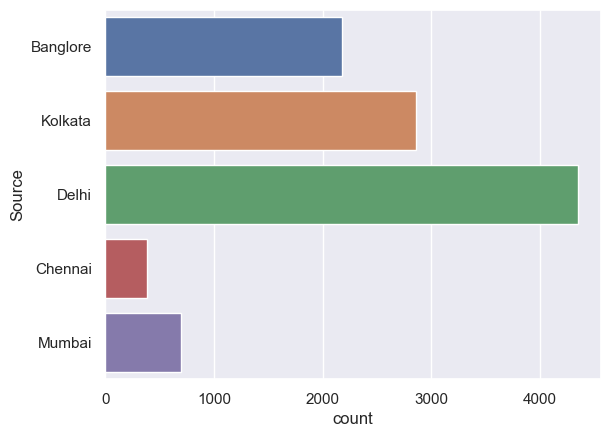

In [11]:
sns.countplot(data=df_eda,y='Source')
plt.show()

The Source Delhi has the highest number of flights departing because we know that Delhi is the capital and the availability of flights from Delhi to any part of the world is more (around 4600) <br>
The Source Chennai has the lowest number of flights departing (around 400)

#### Destination

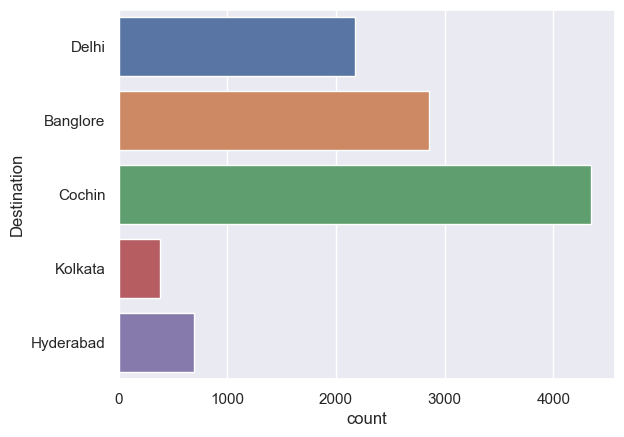

In [12]:
sns.countplot(data=df_eda,y='Destination')
plt.show()

The Destinaiton Cochin has the highest number of flights landing because of the climate and the vacation time - in June month (around 4600) <br>
The Destination Kolkata has the lowest number of flights landing (around 400)

#### Total_Stops

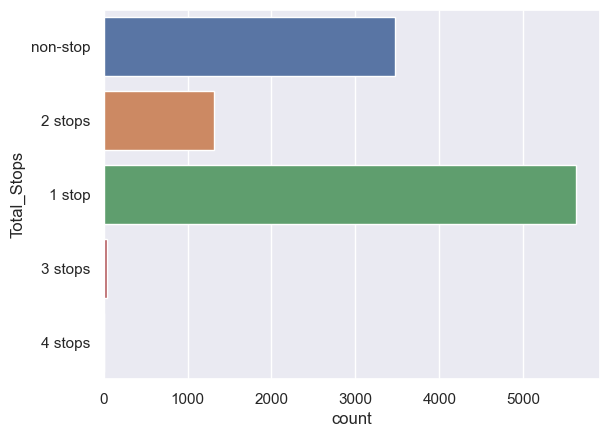

In [13]:
sns.countplot(data=df_eda,y='Total_Stops')
plt.show()

Around 5600 people prefer the flights with 1 stop because though they travel long distance, people prefer 1 stop because of the convenience and timing <br>
Only 1 prefer the flights with 4 stops

#### DOJMonth

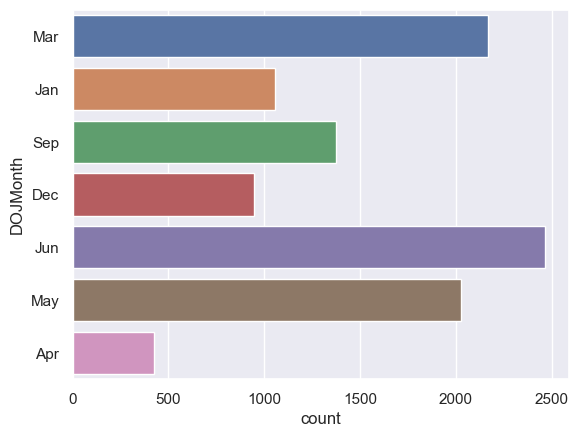

In [14]:
sns.countplot(data=df_eda,y='DOJMonth')
plt.show()

More number of people (around 2450) travel in the month of June because June is the month of vacation and the climate is quite good <br>
Less number of people (around 450) travel in the month of April

#### DTHour

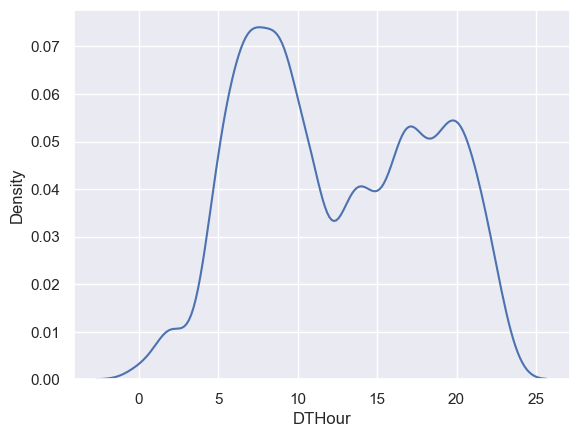

In [15]:
sns.kdeplot(data=df_eda,x='DTHour')
plt.show()

The most preferred Departure time is between 5:00 am to 10:00 am <br>
The least preferred Departure time is between 12:00 am to 4:00 am

#### ATHour

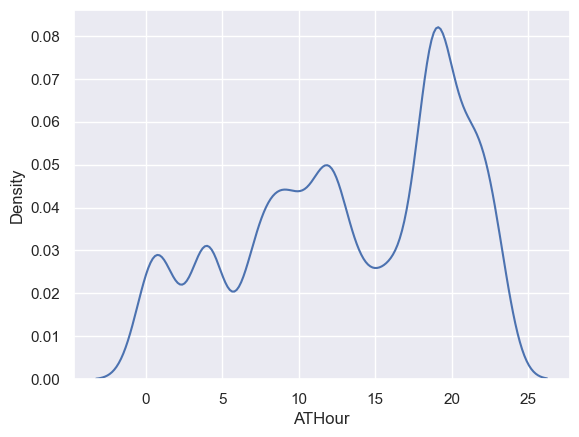

In [16]:
sns.kdeplot(data=df_eda,x='ATHour')
plt.show()

 The most preferred Arrival time is 7:00 pm, 12:00 pm <br>
 The least preferred Arrival time is between 2:00 am to 6:00 am

### Bivariate

#### Airline and Source

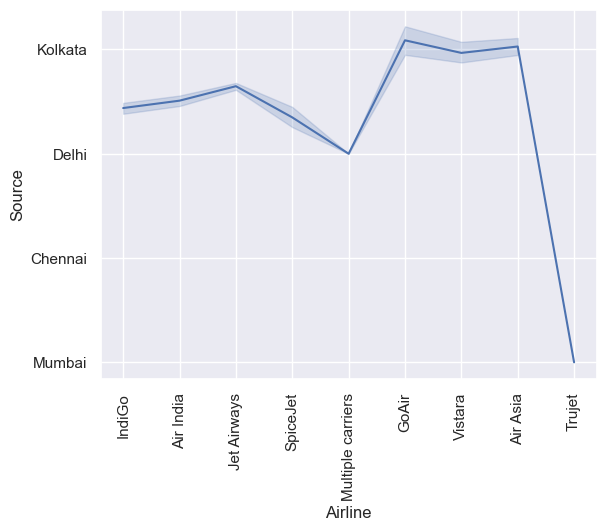

In [17]:
sns.lineplot(data=df_eda,x='Airline',y='Source')
plt.xticks(rotation=90)
plt.show()

The source from which the highest number of IndiGo, Air India, Jet Airways, SpiceJet, Multiple carriers flights take off is Delhi <br>
The source from which the highest number of GoAir, Vistara, Air Asia flights take off is Kolkata

#### Airline and Destination

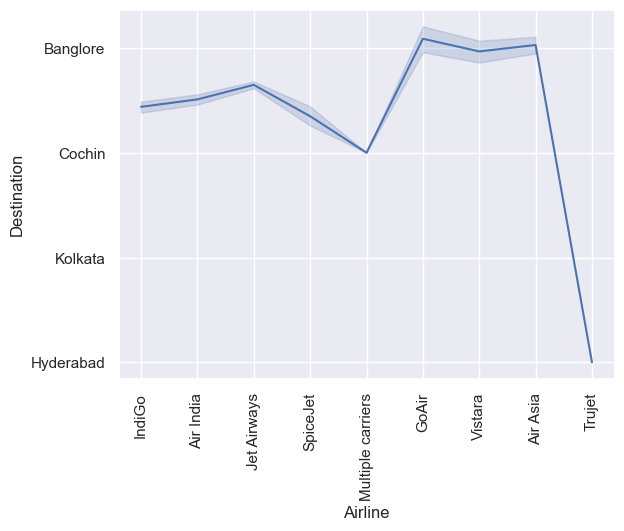

In [18]:
sns.lineplot(data=df_eda,x='Airline',y='Destination')
plt.xticks(rotation=90)
plt.show()

The destination to which the highest number of IndiGo, Air India, Jet Airways, SpiceJet, Multiple carriers flights land is Cochin <br>
The destination to which the highest number of GoAir, Vistara, Air Asia flights land is Bangalore

#### Source pie plot

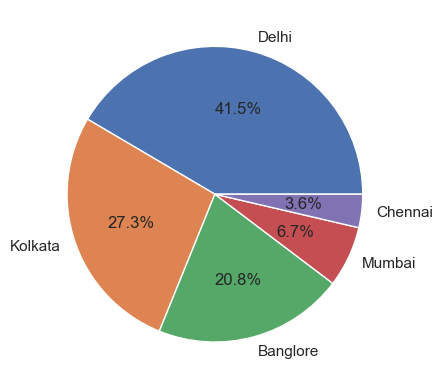

In [19]:
fig,ax=plt.subplots()
sizes=df_eda['Source'].value_counts()
labels=sizes.index
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

41.5% of the flights take off from Delhi <br>
27.3% of the flights take off from Kolkata <br>
20.8% of the flights take off from Bangalore <br>
6.7% of the flights take off from Mumbai <br>
3.6% of the flights take off from Chennai

#### Destination pie plot

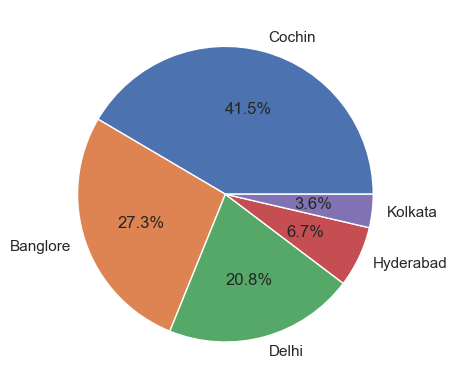

In [20]:
fig,ax=plt.subplots()
sizes=df_eda['Destination'].value_counts()
labels=sizes.index
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

41.5% of the flights land in Cochin <br>
27.3% of the flights land in Bangalore <br>
20.8% of the flights land in Delhi <br>
6.7% of the flights land in Hyderabad <br>
3.6% of the flights land in Kolkata

#### DOJMonth pie plot

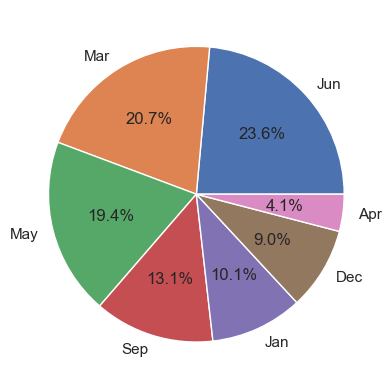

In [21]:
fig,ax=plt.subplots()
sizes=df_eda['DOJMonth'].value_counts()
labels=sizes.index
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

23.6% of the people prefer to travel in the month of June <br>
20.7% of the people prefer to travel in the month of March <br>
19.4% of the people prefer to travel in the month of May <br>
13.1% of the people prefer to travel in the month of September <br>
10.1% of the people prefer to travel in the month of January <br>
9.0% of the people prefer to travel in the month of December <br>
4.1% of the people prefer to travel in the month of April

#### DOJDate and Source

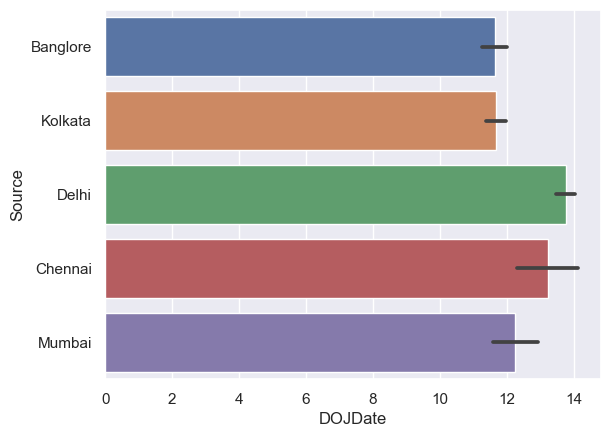

In [22]:
sns.barplot(data=df_eda,x='DOJDate',y='Source')
plt.show()

Most of the people prefer to travel from Delhi in the mid of the month

#### DOJDate and Destination

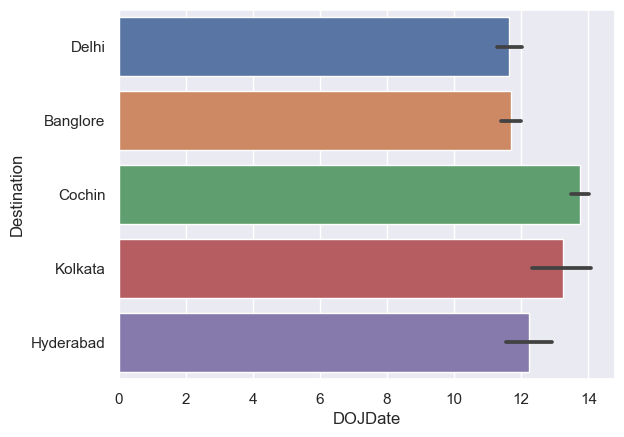

In [23]:
sns.barplot(data=df_eda,x='DOJDate',y='Destination')
plt.show()

Most of the people prefer to travel to Cochin in the mid of the month

#### Source and DTHour

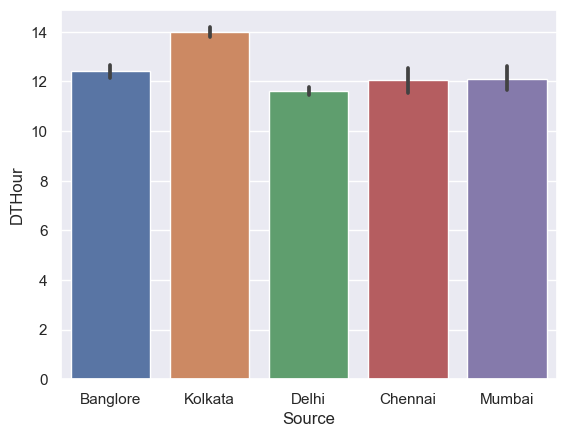

In [32]:
sns.barplot(data=df_eda,x='Source',y='DTHour')
plt.show()

From the source Bangalore, the departure time of the flights is before 12:00 pm

#### Destination and ATHour

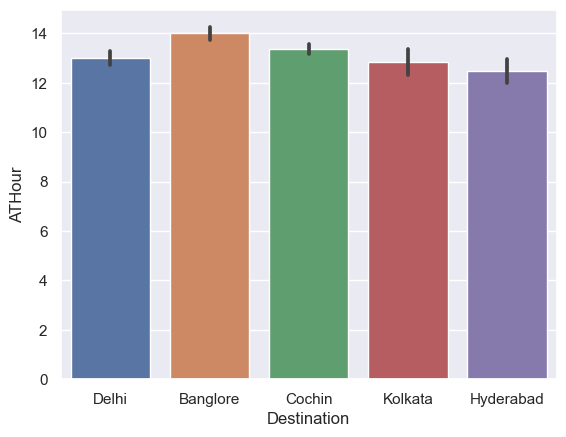

In [33]:
sns.barplot(data=df_eda,x='Destination',y='ATHour')
plt.show()

To the destination Delhi, the arrival time of the flights is before 1:00 pm

#### Price and Total_Stops

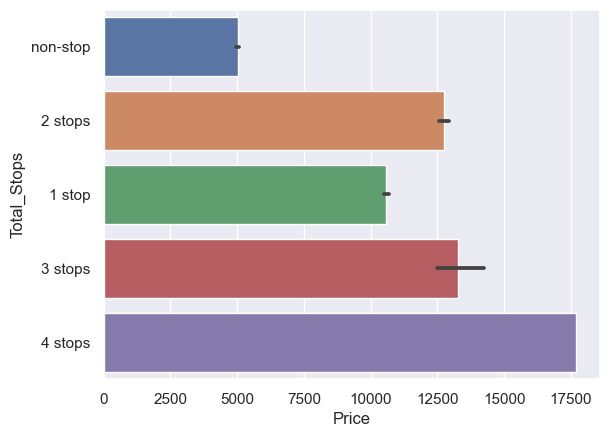

In [24]:
sns.barplot(data=df_eda,x='Price',y='Total_Stops')
plt.show()

As the number of stops increases, the price also increases

#### Duration and Total_Stops

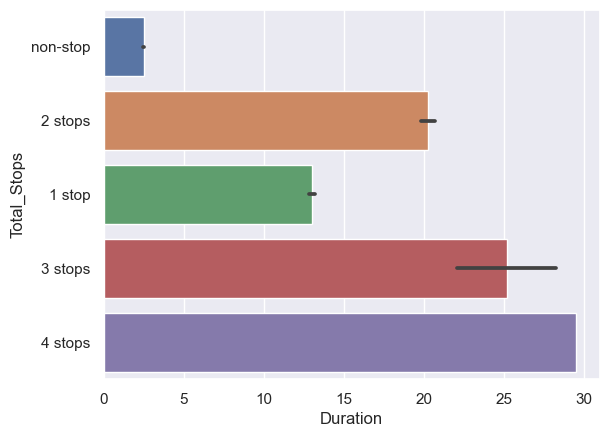

In [25]:
sns.barplot(data=df_eda,x='Duration',y='Total_Stops')
plt.show()

As the number of stops increases, the duration also increases

#### Duration and DOJMonth

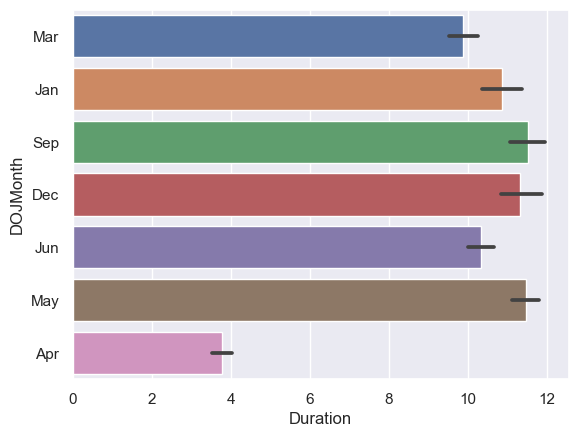

In [26]:
sns.barplot(data=df_eda,x='Duration',y='DOJMonth')
plt.show()

It takes longer to go from source to destination in the month of September, December, May; it may be because of the climatic conditions

#### DOJMonth and DTHour

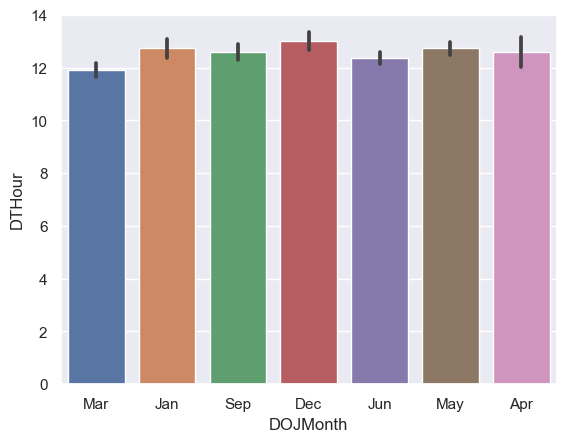

In [27]:
sns.barplot(data=df_eda,x='DOJMonth',y='DTHour')
plt.show()

Most of the flights have departed in the range of 12:00 pm to 2:00 pm in all the months

#### DOJMonth and ATHour

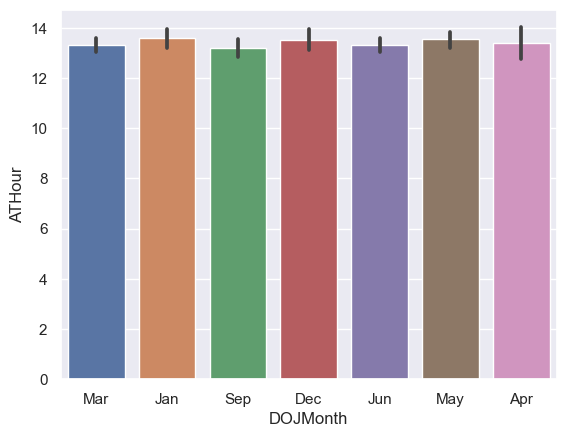

In [28]:
sns.barplot(data=df_eda,x='DOJMonth',y='ATHour')
plt.show()

Most of the flights have arrived in the range of 12:00 pm to 2:00 pm in all the months

### Multivariate

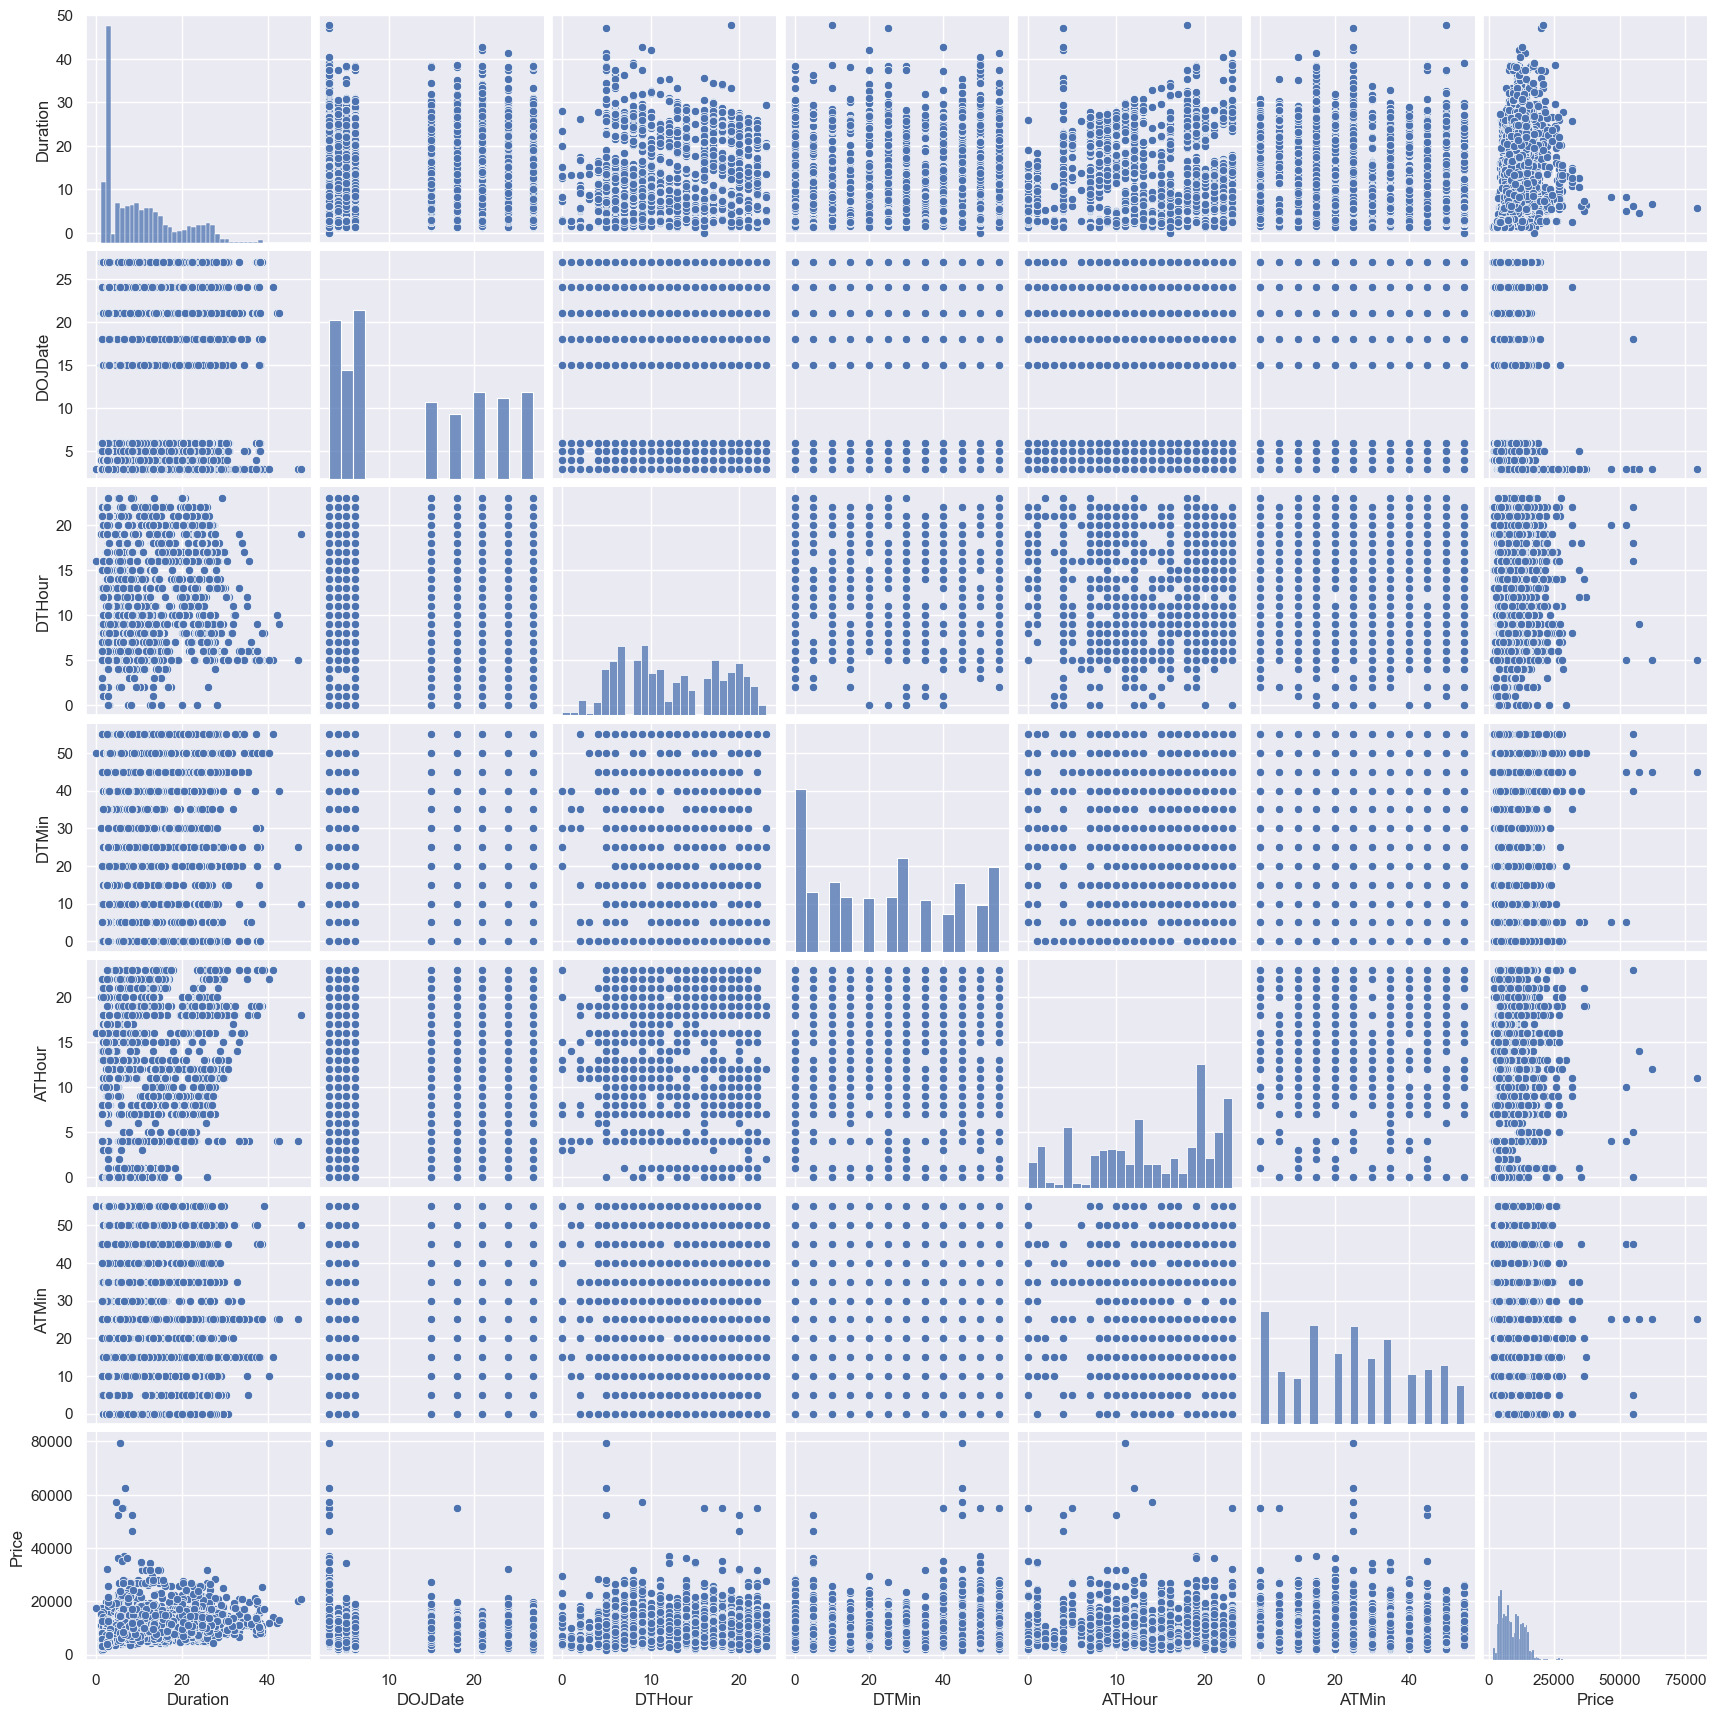

In [123]:
sns.pairplot(data=df_eda)
plt.show()

#### Airline, Duration and Total_Stops

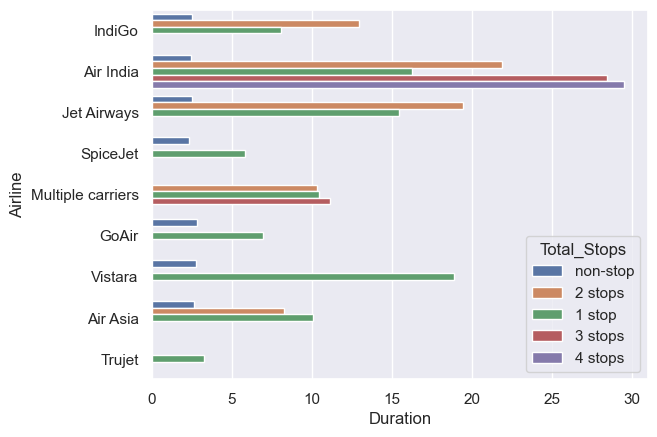

In [45]:
airdur=sns.barplot(data=df_eda,y='Airline',x='Duration',hue='Total_Stops',ci=None)
sns.move_legend(airdur,'lower right')
plt.show()

The flight IndiGo, when travelled with 2 stops takes around 13 hours to travel; when travelled 1 stop takes around 8 hours to travel; when travelled non-stop takes around 3 hours to travel  <br>
Similarly for the other flights as well

#### DOJMonth, Duration and Total_Stops

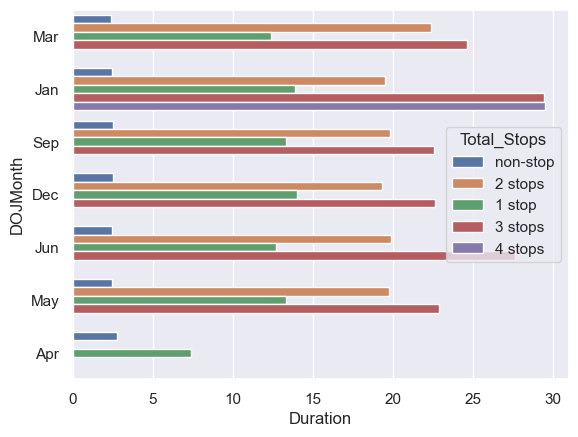

In [47]:
mondur=sns.barplot(data=df_eda,y='DOJMonth',x='Duration',hue='Total_Stops',ci=None)
sns.move_legend(mondur,'center right')
plt.show()

In the month of March, when travelled non-stop it takes around 3 hours; when travelled with 1 stop it takes around 13 hours; when travelled with 2 stops it takes around 22 hours; when travelled with 3 stops it takes around 24 hours <br>
Similarly for the other months as well

#### Airline, Duration and Source

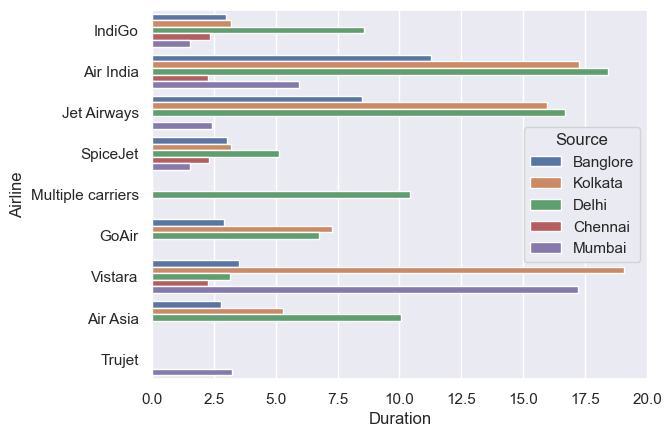

In [48]:
airdursrc=sns.barplot(data=df_eda,y='Airline',x='Duration',hue='Source',ci=None)
sns.move_legend(airdursrc,'center right')
plt.show()

In IndiGo flight, from Bangalore, the travel time is 3 hrs <br>
In IndiGo flight, from Delhi, the travel time is 9 hrs <br>
In IndiGo flight, from Kolkata, the travel time is 3.5 hrs <br>
In IndiGo flight, from Chennai, the travel time is 2.4 hrs <br>
In IndiGo flight, from Mumbai, the travel time is 2 hrs <br>
Similarly, for the other flights as well

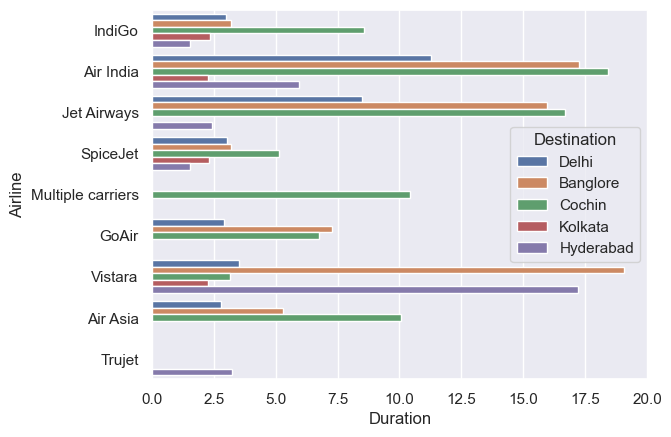

In [49]:
airdurdst=sns.barplot(data=df_eda,y='Airline',x='Duration',hue='Destination',ci=None)
sns.move_legend(airdurdst,'center right')
plt.show()

In IndiGo flight, to Delhi, the travel time is 3 hrs <br>
In IndiGo flight, to Cochin, the travel time is 9 hrs <br>
In IndiGo flight, to Bangalore, the travel time is 3.5 hrs <br>
In IndiGo flight, to Kolkata, the travel time is 2.4 hrs <br>
In IndiGo flight, to Hyderabad, the travel time is 2 hrs <br>
Similarly, for the other flights as well

#### Source, DTHour, Total_Stops

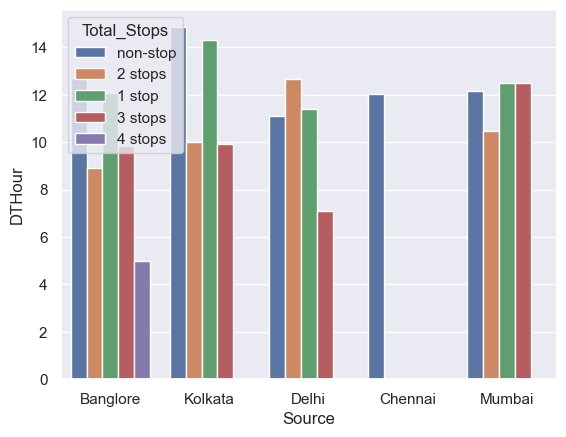

In [50]:
srchr=sns.barplot(data=df_eda,x='Source',y='DTHour',hue='Total_Stops',ci=None)
sns.move_legend(srchr,'best')
plt.show()

 The non-stop flights from the source Bangalore departs at 12:30 pm <br>
 The 1 stop flights from the source Bangalore departs at 12:15 pm <br>
 The 2 stop flights from the source Bangalore departs at 2:00 pm <br>
 The 3 stop flights from the source Bangalore departs at 10:00 pm <br>
 The 4 stop flights from the source Bangalore departs at 5:00 pm <br>
 Similarly for the other sources as well

 #### Destination, ATHour, Total_Stops

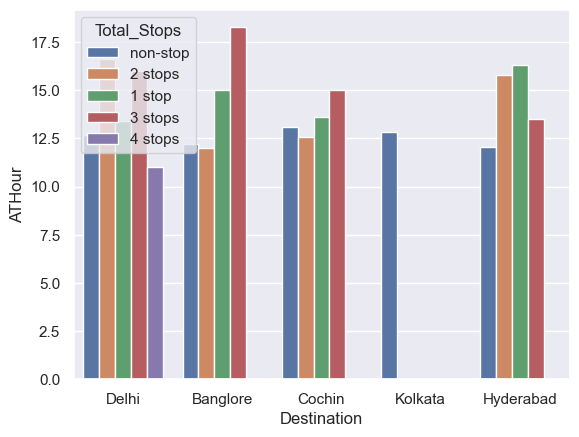

In [51]:
dsthr=sns.barplot(data=df_eda,x='Destination',y='ATHour',hue='Total_Stops',ci=None)
sns.move_legend(dsthr,'best')
plt.show()

The non-stop flights to the destination Delhi arrives at 12:30 pm <br>
The 1 stop flights to the destination Delhi arrives at 1:00 pm <br>
The 2 stop flights to the destination Delhi arrives at 5:30 pm <br>
The 3 stop flights to the destination Delhi arrives at 4:00 pm <br>
The 4 stop flights to the destination Delhi arrives at 11:00 pm <br>
Similarly for the other destinations as well

## Import libraries necessary for model building

In [2]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from sklearn.model_selection import train_test_split
# We know that this is a regression problem under supervised learning.. So, the algorithms that are used for regression are,
# Linear regression
# Decision tree regressor (we also have Decision tree classifier, because Decision tree algorithm can solve both classification and regression problems)
# Random forest regressor (similar to Decision tree algorithm)
# XGBoost regressor (we learnt a bit about this in Ada Boost)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor # xgboost is a separate library in itself
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [10]:
df_model

,Duration,Total_Stops,DOJDate,DOJMonth,DTHour,DTMin,ATHour,ATMin,Airline_Air India,Airline_GoAir,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Price
0,2.83,0,24,3,22,20,1,10,0,0,...,0,0,0,0,0,0,1,0,0,3897
1,7.42,2,5,1,5,50,13,15,1,0,...,0,0,0,1,0,0,0,0,0,7662
2,19.00,2,6,9,9,25,4,25,0,0,...,0,0,1,0,0,1,0,0,0,13882
3,5.42,1,5,12,18,5,23,30,0,0,...,0,0,0,1,0,0,0,0,0,6218
4,4.75,1,3,1,16,50,21,35,0,0,...,0,0,0,0,0,0,1,0,0,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2.50,0,4,9,19,55,22,25,0,0,...,0,0,0,1,0,0,0,0,0,4107
10679,2.58,0,27,4,20,45,23,20,1,0,...,0,0,0,1,0,0,0,0,0,4145
10680,3.00,0,27,4,8,20,11,20,0,0,...,0,0,0,0,0,0,1,0,0,7229
10681,2.67,0,3,1,11,30,14,10,0,0,...,1,0,0,0,0,0,1,0,0,12648


## Train test split

In [11]:
x=df_model.drop('Price',axis=1)
y=df_model['Price']

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

## Function for evaluation

In [20]:
p=df_model.shape
p=p[1] # getting the no of columns alone from the shape of the dataframe
n=df_model.size
n # 'n' is the no of observations in the sample
def predict(ml_model):
    print('Model name:',ml_model)
    mod=ml_model.fit(x_train,y_train)
    print('Training score:',mod.score(x_train,y_train))
    preds=mod.predict(x_test)
    
    # Evaluation metrics of regression include r2_score,adjusted r2_score, MSE, MAE, ...
    r2=r2_score(y_test,preds)
    print('R-squared value:',r2)
    adjr2=1-((1-r2)*(n-1)) / (n-1-p)
    print('Adjusted R-squared value:',adjr2)
    mae=mean_absolute_error(y_test,preds)
    print('MAE:',mae)
    mse=mean_squared_error(y_test,preds)
    print('MSE:',mse)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    print('RMSE:',rmse)

### Ideally in industry, the difference between the training score and the test score can be around 10%..This means that the model is a very good model

In [14]:
predict(LinearRegression())

Model name: LinearRegression()
Training score: 0.5356975264334809
R-squared value: 0.5755459875986846
Adjusted R-squared value: 0.5755054125451138
MAE: 2012.987678722138
MSE: 8844880.612859188
RMSE: 2974.034400079997


The training score is __53%__ which is poor

The test score (R-squared value) is __57%__ which is also poor

#### This is a bad model

In [15]:
predict(DecisionTreeRegressor())

Model name: DecisionTreeRegressor()
Training score: 0.9700213788976423
R-squared value: 0.7185779097287939
Adjusted R-squared value: 0.7185510076002826
MAE: 1374.008552317248
MSE: 5864345.058697776
RMSE: 2421.640984683274


The training score is __97%__ which is overfitting

The test score (R-squared value) is __71%__ which is a pretty good test score

#### This is a overfitting model

In [18]:
predict(RandomForestRegressor())

Model name: RandomForestRegressor()
Training score: 0.9511828861015746
R-squared value: 0.8002569515306333
Adjusted R-squared value: 0.8002378573893241
MAE: 1193.8320064381787
MSE: 4162296.421619643
RMSE: 2040.1706844329576


The training score is __94%__ which is slightly overfitting

The test score (R-squared value) is __80%__ which is good

#### This is a slightly overfitting model

But, we can do hyper parameter tuning inorder to improve its performance

In [17]:
predict(XGBRegressor())

Model name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Training score: 0.9381166942615944
R-squared value: 0.8326092546533077
Adjusted R-squared value: 0.8325932531825683
MAE: 1157.4532257823698
MSE: 3488130.9047189946
RMSE: 1867.6538503478087


The training score is __93%__ which is very good

The test score (R-squared value) is __83%__ which is also very good

#### This is a very good model

### Doing hyper parameter tuning in RandomForestRegressor()

In [33]:
param=[{'max_depth':[5,10,15],'n_estimators':[50,100,150],'max_features':['sqrt',0.2,0.3,0.5]}]
rf=RandomForestRegressor()
gscv=GridSearchCV(rf,param,cv=10,scoring='r2')

In [34]:
predict(gscv)

Model name: GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'max_features': ['sqrt', 0.2, 0.3, 0.5],
                          'n_estimators': [50, 100, 150]}],
             scoring='r2')
Training score: 0.9381803724161091
R-squared value: 0.8288375866869061
Adjusted R-squared value: 0.8288212246691455
MAE: 1160.615560789076
MSE: 3566725.880616233
RMSE: 1888.5777401569237


In [35]:
gscv.best_score_

0.8255051602790864

In [36]:
gscv.best_params_

{'max_depth': 15, 'max_features': 0.5, 'n_estimators': 100}

We can see that the RandomForestRegressor() model actually had 94% as training score and 80% as test score

By doing hyper parameter tuning, we improved the test score of the model to 82% which is pretty good 

Finally, the training score is 93% which is very good

The test score (R-squared value) is 82% which is also very good

#### This is a very good model